<h2>第3回の内容</h2>

In [18]:
# ここから実際の予測を行っていく

# 使用するライブラリとデータを読み込む
import pandas as pd 
import numpy as np 
 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
# from dtreeviz.trees import dtreeviz

train = pd.read_csv("./csv_data/train.csv")
test = pd.read_csv("./csv_data/test.csv")
# データ前処理をおこなう
train = train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
test = test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
# 欠損値処理
print(train.isnull().sum())
print("---------")
print(test.isnull().sum())
# train の Embarked の欠損処理
#埋める前ではS,C,Q,nanの4種類あることを確認
train["Embarked"].unique()  #embarkedの中にある４種類を出す

#Embarkedの欠損を最頻値で埋める
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().iloc[0]) 

#埋めた後ではS,C,Qの3種類あることを確認
train["Embarked"].unique()
#Ageの欠損を中央値で埋める
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

#欠損値がなくなったか確認
print(train["Age"].isnull().sum())
print(test["Age"].isnull().sum())
#Fareを中央値で埋める
test["Fare"] = test["Fare"].fillna(test["Fare"].median()) 

#欠損がなくなったか確認
test["Fare"].isnull().sum()
#データ型の確認
train.dtypes
#maleを0に、femaleを1に変換
train["Sex"] = train["Sex"].map({"male":0,"female":1})
test["Sex"] = test["Sex"].map({"male":0,"female":1})
#Embarkedをダミー変数化
train = pd.get_dummies(train,columns=["Embarked"])  
test = pd.get_dummies(test,columns=["Embarked"])  #ダミー変数 １ －１ 、１ ０  、 embarked は三種類 / 3種類以上 は  a b c d e 分析に近い

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
---------
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
0
0


In [19]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,28.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [20]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,27.0,0,0,8.0500,0,0,1


<h2>第4回の内容</h2>

In [21]:
# train 8割  train ２割
# train_set , test size 
#訓練データとテストデータに分割 
# 決定木 深さ 男性０ 女性１ 
train_set, test_set = train_test_split(train, test_size = 0.2, random_state = 1)

X_train = train_set.iloc[:,1:]
y_train = train_set.iloc[:,0]

X_test = test_set.iloc[:,1:]
y_test = test_set.iloc[:,0]

In [22]:
#決定木モデルの作成
clf1 =DecisionTreeClassifier(max_depth=4)
clf1 = clf1.fit(X_train, y_train)

In [23]:
#予測
y_pred_test = clf1.predict(X_test)

#テストデータの正解率
accuracy_score(y_test,y_pred_test)

0.7821229050279329

<h3>予測結果をわかりやすく表にまとめる</h3>

In [24]:
from sklearn.metrics import confusion_matrix

#混同行列の作成
matrix = confusion_matrix(y_test,y_pred_test)

#pandasで表の形に
class_names = ["died","survived"]
df = pd.DataFrame(matrix,index=class_names,columns=class_names)

df

,died,survived
died,94,12
survived,27,46


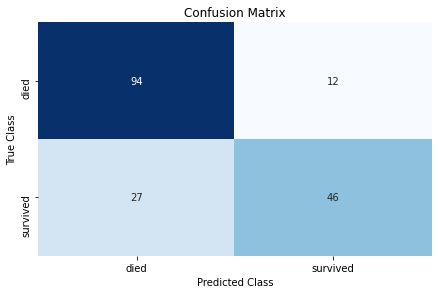

In [25]:
#ヒートマップの作成
sns.heatmap(df,annot=True,cbar=None,cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

<h3>ランダムフォレストをもちいて指標の重要度を出力</h3>

In [46]:
#ランダムフォレストモデルの作成
RF = RandomForestClassifier(n_estimators=250,random_state=1)
RF = RF.fit(X_train,y_train)

In [47]:
#予測
y_pred_test = RF.predict(X_test)

#テストデータの正解率
accuracy_score(y_test,y_pred_test)

0.7877094972067039

In [27]:
#特徴量と重要度を取得
features = X_train.columns
importances = RF.feature_importances_

#表にする
df = pd.DataFrame({"features":features,"importances":importances}).sort_values("importances",ascending=False)
df.reset_index(drop=True)

,features,importances
0,Sex,0.264729
1,Age,0.258821
2,Fare,0.251651
3,Pclass,0.096193
4,SibSp,0.048917
5,Parch,0.039681
6,Embarked_S,0.016267
7,Embarked_C,0.014256
8,Embarked_Q,0.009484
